In [3]:
import random
import math

actions = ['POISON', 'FART_SPRAY', 'OXYCOTTON', 'EXERCISE']

def R(a):
    if a == 'POISON':
        return -100
    elif a == 'FART_SPRAY':
        return 0
    elif a == 'OXYCOTTON':
        return -10
    elif a == 'EXERCISE':
        return 50
    else:
        return 0

q = [(random.random()-0.5)*20 for _ in range(len(actions))]

In [4]:
from tqdm import trange
import time

# epsilon greedy method

epsilon = 0.1
n_steps = 100
lr = 0.025

for _ in (t:=trange(100)):
    cum_reward = 0
    for i in range(n_steps):
        if random.random() > epsilon:
            highest_reward = -math.inf
            best_action = ''
            best_action_idx = -1
            for i in range(len(actions)):
                if q[i] > highest_reward:
                    highest_reward = q[i]
                    best_action = actions[i]
                    best_action_idx = i
            reward = R(best_action)
            cum_reward += reward
            q[best_action_idx] = q[best_action_idx] + lr * (reward-q[best_action_idx])

        else:
            random_action_idx = math.floor(random.random() * len(actions))
            random_action = actions[random_action_idx]
            reward = R(random_action)
            cum_reward += reward
            q[random_action_idx] = q[best_action_idx] + lr * (reward-q[best_action_idx])
    
    
    t.set_description(f'avg reward: {cum_reward}')






avg reward: 4290:   0%|          | 0/100 [00:00<?, ?it/s]

avg reward: 4520: 100%|██████████| 100/100 [00:00<00:00, 1810.22it/s]


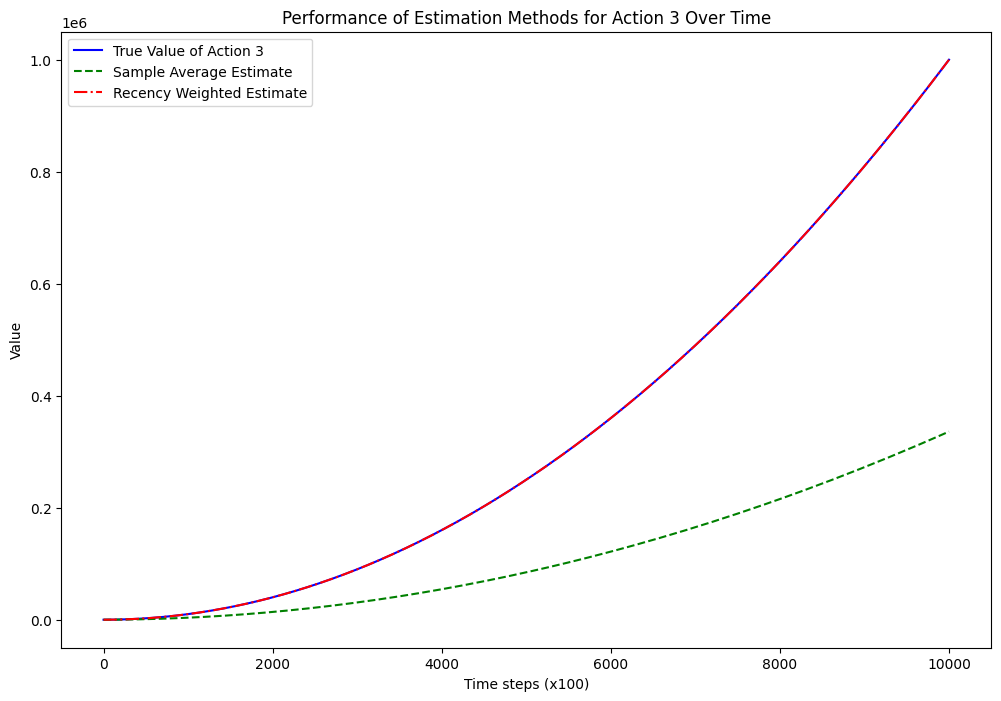

In [141]:
# sample average method vs. recency weighting method for nonstationary problems

import matplotlib.pyplot as plt
import numpy as np
import random

actions = [1, 2, 3, 4, 5]

def R(i, t):
    if i == 0:
        return actions[i] - 0.000001*t
    elif i == 1:
        return actions[i] - 0.00001*t
    elif i == 2:
        return actions[i] + 0.000001*(t**2)
    elif i == 3:
        return actions[i]
    elif i == 4:
        return actions[i] - 0.00001*t

T = 1_000_000
q_sample_avg = [0, 0, 0, 0, 0]
q_recency_weighted = [0, 0, 0, 0, 0]
n = [0, 0, 0, 0, 0]
epsilon = 0.01
learning_rate = 0.05

true_values = []
sample_avg_estimates = []
recency_weighted_estimates = []

for t in range(1, T):
    if random.random() < epsilon:
        i = random.randint(0, len(actions) - 1)
    else:
        i = np.argmax(q_sample_avg)

    n[i] += 1
    q_sample_avg[i] = (1- 1/n[i]) * q_sample_avg[i]  + (1 / n[i]) * R(i, t)

    q_recency_weighted[i] = (1-learning_rate)*q_recency_weighted[i]  + learning_rate * R(i, t)

    if t % 100 == 0:
        true_values.append(R(2, t))
        sample_avg_estimates.append(q_sample_avg[2])
        recency_weighted_estimates.append(q_recency_weighted[2])

plt.figure(figsize=(12, 8))
plt.plot(true_values, label='True Value of Action 3', color='blue')
plt.plot(sample_avg_estimates, label='Sample Average Estimate', linestyle='--', color='green')
plt.plot(recency_weighted_estimates, label='Recency Weighted Estimate', linestyle='-.', color='red')
plt.title('Performance of Estimation Methods for Action 3 Over Time')
plt.xlabel('Time steps (x100)')
plt.ylabel('Value')
plt.legend()
plt.show()
